# Aufgabenstellung 2

In [9]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [10]:
import matplotlib.pyplot as plt
import numpy             as np

In [18]:
# Parameter
h         = 0.02  # Schrittweite
t_end     = 31.0

In [19]:
# Anlegen der Ergebnisarrays
steps = int(t_end/h)
print('steps =', steps)

t       = np.zeros(steps)  # Array für unabhängige Variable
y_1_euler = np.zeros(steps)  # Output für abhängige Variable (berechnet mit Euler)
y_2_euler = np.zeros(steps)  # Output für abhängige Variable (berechnet mit Euler)
y_1_RK2   = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)
y_2_RK2   = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)

steps = 1550


In [20]:
# Initialisierung des Anfangswertes
y_1_euler[0] = 1
y_1_RK2[0]   = 1
y_2_euler[0] = 0
y_2_RK2[0]   = 0
t[0]       = 0

steps       = 1549
range_steps = range(0, 1549)


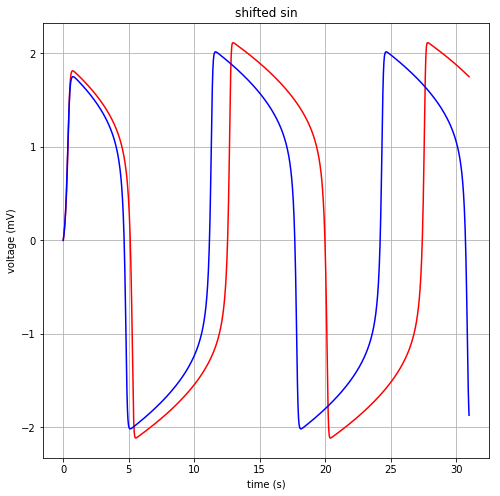

In [22]:
def y_1_dot(y_1,y_2):
    return 6*(1-y_2*y_2)*y_1-y_2

def y_2_dot(y_1):
    return y_1
# Euler-Iteration

print('steps       =',steps-1)
print('range_steps =',range(steps-1))

# jetzt mit Euler die 
for i in range(steps-1) :
    y_1_euler[i+1] = y_1_euler[i] + h * y_1_dot(y_1_euler[i], y_2_euler[i])
    y_2_euler[i+1] = y_2_euler[i] + h * y_2_dot(y_1_euler[i])
    t[i+1]       = t[i] + h


# jetzt mit RK2 die 
for i in range(steps-1) :
    k1 = h * y_1_dot(y_1_RK2[i],y_2_RK2[i])
    l1 = h * y_2_dot(y_1_RK2[i])
              
    k2 = h * y_1_dot(y_1_RK2[i]+k1/2,y_2_RK2[i]+l1/2)
    l2 = h * y_2_dot(y_1_RK2[i]+k1/2)       
    
    y_1_RK2[i+1] = y_1_RK2[i] + k2
    y_2_RK2[i+1] = y_2_RK2[i] + l2
    
    t[i+1]       = t[i] + h


    
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot( t, y_2_euler, 'r')
#fig, ax = plt.subplots(figsize=(8,8))
ax.plot( t, y_2_RK2,'b')

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='shifted sin')
ax.grid()

fig.savefig("test.png")
plt.show()